In [92]:
import json
import random
from collections import defaultdict

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import HTML

In [69]:
with open("scripts/retrieval_results_wide_baseline_val.txt") as f:
    baseline_pids = [line.strip().split("####")[1].split("\t") for line in f.readlines()]

with open("scripts/retrieval_results_reranker_finetuned_tinybert.txt") as f:
    reranked_pids = [line.strip().split("####")[1].split("\t") for line in f.readlines()]

with open("data/mdd_all/dd-generation-structure/val.pids") as f:
    val_pids = [line.strip() for line in f.readlines()]

with open("data/mdd_all/dd-generation-structure/val.source") as f:
    sources = [line.strip() for line in f.readlines()]

with open("data/mdd_dpr/dpr.psg.multidoc2dial_all.structure.json") as f:
    passages = json.load(f)

passage_map = {p["id"]: p for p in passages}

In [3]:
reranked_pids

[['1806',
  '2441',
  '1869',
  '2340',
  '2344',
  '1871',
  '3276',
  '2339',
  '770',
  '3169'],
 ['1806',
  '2441',
  '1874',
  '1868',
  '2824',
  '2340',
  '1871',
  '2444',
  '2823',
  '3169'],
 ['2612',
  '2608',
  '1804',
  '2607',
  '2534',
  '1806',
  '2548',
  '2121',
  '2441',
  '2755'],
 ['2441',
  '2975',
  '2944',
  '2926',
  '1771',
  '2442',
  '2014',
  '2444',
  '2194',
  '2753'],
 ['2441',
  '1905',
  '2193',
  '724',
  '1808',
  '1093',
  '999',
  '2273',
  '2444',
  '2442'],
 ['2327',
  '2612',
  '2965',
  '2635',
  '2331',
  '733',
  '1404',
  '2328',
  '2610',
  '2636'],
 ['2612',
  '2607',
  '1804',
  '2755',
  '2121',
  '2610',
  '2608',
  '442',
  '438',
  '1346'],
 ['3169',
  '1806',
  '2441',
  '2340',
  '2344',
  '2339',
  '1804',
  '2345',
  '2346',
  '2545'],
 ['1878',
  '3283',
  '1926',
  '2608',
  '1838',
  '2545',
  '1829',
  '1889',
  '1806',
  '3199'],
 ['2558',
  '2612',
  '1804',
  '2559',
  '3585',
  '721',
  '3273',
  '2561',
  '1010',
  '1151'

In [5]:
rr_values = []
n_misses = 0
mrr_at_k = 30

for retrieved_pids, correct_pid in zip(baseline_pids, val_pids):
    try:
        retrieved_idx = retrieved_pids[:mrr_at_k].index(correct_pid) + 1
        rr_values.append(1/(retrieved_idx))
    except ValueError:
        n_misses += 1

print(np.mean(rr_values) * 100)

56.22784106746098


In [9]:
p_at_1 = 0
p_at_10 = 0
p_at_30 = 0

for retrieved_pids, correct_pid in zip(reranked_pids, val_pids):
    if correct_pid in retrieved_pids[:1]:
        p_at_1 += 1
    if correct_pid in retrieved_pids[:10]:
        p_at_10 += 1
    if correct_pid in retrieved_pids[:30]:
        p_at_30 += 1        

p_at_1 / len(baseline_pids), p_at_10 / len(baseline_pids), p_at_30 / len(baseline_pids)

(0.2399428707450607, 0.6296119971435372, 0.6296119971435372)

In [8]:
p_at_1 = 0
p_at_10 = 0
p_at_30 = 0

for retrieved_pids, correct_pid in zip(baseline_pids, val_pids):
    if correct_pid in retrieved_pids[:1]:
        p_at_1 += 1
    if correct_pid in retrieved_pids[:10]:
        p_at_10 += 1
    if correct_pid in retrieved_pids[:30]:
        p_at_30 += 1        

p_at_1 / len(baseline_pids), p_at_10 / len(baseline_pids), p_at_30 / len(baseline_pids)

(0.3487264936919781, 0.7198286122351821, 0.8467031659128779)

In [70]:
zipped = list(zip(sources, val_pids, baseline_pids, reranked_pids))

In [91]:
thing = random.choice(zipped)
question, correct_pid, baseline_list, reranked_list = thing
len(baseline_list), len(reranked_list)

baseline_rank = baseline_list.index(correct_pid) if correct_pid in baseline_list else None
reranked_rank = reranked_list.index(correct_pid) if correct_pid in reranked_list else None

print(question)
print(f"Original rank: {baseline_rank}, Reranked rank: {reranked_rank}")

baseline_passages = [passage_map[int(baseline_list[i])]["text"] for i in range(5)]
reranked_passages = [passage_map[int(reranked_list[i])]["text"] for i in range(5)]

pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_colwidth', 2000)
pd.DataFrame({"Baseline": baseline_passages, "Reranked": reranked_passages})

Yeah, we have that.[SEP]agent: Both you and your spouse share the same last name?||user: Hello, i'm trying to find proof of my ID for some procedures with you. I don't find any at the moment, but my spouse have some, Can those be useful?
Original rank: 0, Reranked rank: 1


,Baseline,Reranked
0,"Help finding enough proof of ID // You can use proof-of-residence documents that are in your spouse s name if you and your spouse have the same last name you show additional documents that prove your relationship for example, a marriage certificate","Adding and removing users // When DMV creates a LENS roster , we issue a personal user ID and password to the applicant. If your organization has more than one person who may use LENS , we will gladly issue additional user IDs. Every LENS user may, and should, have their own personal logon. Please do not share your logon or password with others."
1,"Learn what documents you will need to get a Social Security Card | Social Security Administration // What original documents do I need? Citizenship If you have not already established your child's U.S. citizenship with us , we need to see proof of U.S. citizenship. We can accept only certain documents as proof of U.S. citizenship. These include a U.S. birth certificate or U.S. passport. Important This documentation is only required if your child hasNOT already established citizenship with us. Name Change If you need to change the name on your child's Social Security card , you must show us proof of your child's legal name change. Documents Social Security may accept to prove your child's legal name change include : Final adoption decree with the new name ; Court order approving the name change ; or Amended birth certificate with the new name. If the document you provide as evidence of your child's legal name change does not give us enough information to identify your child in our records or if you changed your child's name more than four years ago , you must show us an identity document in your child's prior name as shown in our records. We will accept an identity document in your child's old name that has expired. If you do not have an identity document in your child's prior name , we may accept an unexpired identity document in your child's new name, as long as we can properly establish your child's identity in our records. Identity Your child : We can accept only certain documents as proof of your child's identity. An acceptable document must show your child's name, identifying information i.e., age, date of birth, or parents' names and preferably a recent photograph. We generally can accept a non - photo identity document if it has enough information to identify the child such as the child's name and age, date of birth or parents' names. We prefer to see the child's U.S. passport. If that document is not available , we may acce...","Help finding enough proof of ID // You can use proof-of-residence documents that are in your spouse s name if you and your spouse have the same last name you show additional documents that prove your relationship for example, a marriage certificate"
2,"Learn what documents you will need to get a Social Security Card | Social Security Administration // What original documents do I need? Citizenship If you have not already established your U.S. citizenship with us , we need to see proof of U.S. citizenship. We can accept only certain documents as proof of U.S. citizenship. These include a U.S. birth certificate or U.S. passport. Important This documentation is only required if you haveNOT already established citizenship with us. Name Change If you need to change your name on your Social Security card , you must show us proof of your legal name change. Documents Social Security may accept to prove a legal name change include : Marriage document ; Divorce decree ; Certificate of Naturalization showing the new name ; or Court order approving the name change. If the document you provide as evidence of a legal name change does not give us enough information to identify you in our records or if you changed your name more than two years ago four years ago if you are under 18 years of age , you must show us an identity document in your prior name as shown in our records. We will accept an id

In [79]:
passage_map[int(correct_pid)]

{'text': 'Prepare for your road test //   What do I need to do before I take my road test?   Once you have a learner permit ,  you must  obey the learner permit restrictions [1] on where and when you may drive [1 ]  complete a 5-hour Pre - licensing Course or a high school or college Driver Education Course  get an appropriate amount of supervised driving practice 1  if you are under age 18 ,  you must wait at least six months from the date you received your learner permit to schedule your road test [1 ]',
 'title': 'Prepare for your road test#3_0',
 'id': 1839}

In [75]:
passage_map[288]["text"] == passage_map[292]["text"]


True

In [105]:
misses = defaultdict(lambda: 0)
n = defaultdict(lambda: 0)
idx_offset = defaultdict(lambda: [])


for _, correct_pid, baseline_list, retrieved_list in zipped:
    if correct_pid not in baseline_list:
        continue

    baseline_idx = baseline_list.index(correct_pid)
    retrieved_idx = retrieved_list.index(correct_pid) if correct_pid in retrieved_list else None
    n[baseline_idx] += 1

    if retrieved_idx is None:
        misses[baseline_idx] += 1
    
    else:
        idx_offset[baseline_idx].append(retrieved_idx)
    

In [106]:
tuples = [(key, misses[key]/n[key]) for key in sorted(misses.keys())]

<BarContainer object of 30 artists>

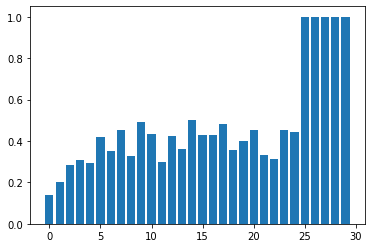

In [107]:
plt.bar(*zip(*tuples))